In [1]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import xgboost as xgb

In [2]:
datasig=pd.read_csv("sig_many_values.csv")
databkg=pd.read_csv("bkg_many_values.csv")
datasig["label"]=1
databkg["label"]=0
data2=datasig.append(databkg,ignore_index=True)

In [3]:
data2.shape

(151762, 58)

In [4]:
data2.head()

,jetPt_1,jetEta_1,jetPhi_1,jetE_1,jetPt_2,jetEta_2,jetPhi_2,jetE_2,jetPt_3,jetEta_3,...,phistarZ1_3,phistarZ1_4,phistarZ2_1,phistarZ2_3,top1_tt_costheta,diPhoPhi,diPhoEta,diPhoPtoM,weight,label
0,179.1340,0.129419,-0.770991,184.053,75.2335,-0.047224,-1.281490,76.1059,61.6183,0.663539,...,-2.379720,1.19940,-1.53339,-2.367100,0.270590,1.47030,0.659044,1.629320,0.000071,1
1,161.2780,1.071580,-0.156882,263.612,126.8670,0.646219,2.747790,155.3490,91.9070,0.088171,...,-0.525956,-2.96952,-3.08811,-0.711825,-0.763741,-3.10210,1.074770,0.598067,0.000073,1
2,157.1970,-0.333851,0.212655,166.653,68.6658,-1.467650,0.122107,157.2250,67.9321,-1.392230,...,-0.404450,2.74092,-2.43338,0.086144,-0.288391,2.64547,-0.449345,1.746590,0.000053,1
3,143.9920,-0.899087,-0.825905,206.971,112.7960,0.119058,0.629660,114.7540,73.4163,0.139243,...,-2.506560,1.34048,1.24491,1.365350,0.260298,2.49579,-0.719844,2.053300,0.000010,1
4,85.5433,0.699251,-2.586590,108.438,74.1270,0.099549,-0.422806,75.8854,67.6496,-0.049040,...,-2.248530,1.70159,1.73960,0.855082,0.285667,2.53021,-1.809120,0.284786,0.000089,1


In [5]:
X,y=data2.iloc[:,:-3],data2.iloc[:,-1]
weights=data2.iloc[:,-2]
X_train, X_test, y_train, y_test,weight_train,weight_test= train_test_split(X, y,weights,test_size=0.4, random_state=7)

In [6]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

/home/renqi/.local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [7]:
params = {"objective":"reg:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 8, 'alpha': 10,"eval_metric":"error"}
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,num_boost_round=10,early_stopping_rounds=5, as_pandas=True, seed=123)

In [8]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10,)

In [9]:
dtest = xgb.DMatrix(data=X_test)

In [10]:
y_preds=xg_reg.predict(dtest)

In [11]:
predictions = [round(value) for value in y_preds]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 60.48%


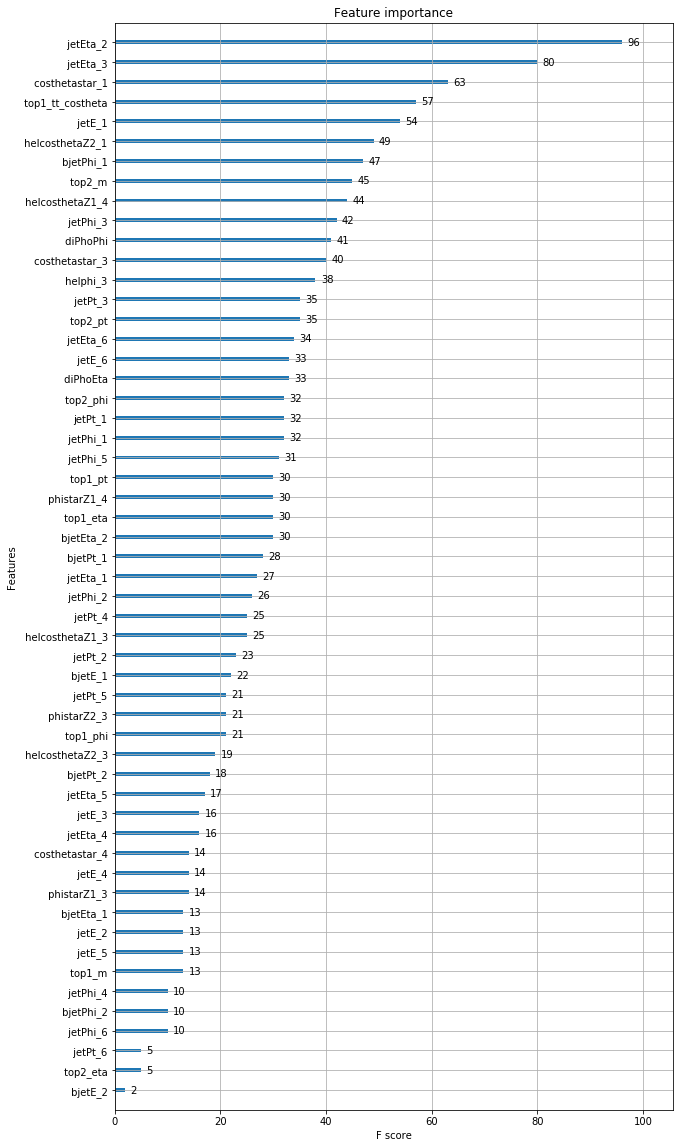

In [22]:
import matplotlib.pyplot as plt
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 20]
plt.show()

In [24]:
weight_test;